                                                                    Name       : Mahesh Baiju
                                                                    Student Id : SC24M130
                                                                    Course     : Geoinformatics

1.	Train a SVM (Support Vector Machine) and RF (Random Forest) model for classification purposes. Generate a classification report (showing precision, recall, and f1 score for each class) and include confusion matrix for the same.
2.	Apply the trained model to predict the given image.

In [2]:
csv_path=r"C:\Users\Mahesh\Documents\RS_data\Lab_6_Classification\training_data.csv"
image_path=r"C:\Users\Mahesh\Documents\RS_data\Lab_6_Classification\Image_subset"

Accuracy: 84.5734%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.82      0.87       144
         1.0       0.73      0.97      0.83       145
         2.0       0.63      0.82      0.71        45
         3.0       0.82      0.53      0.65        43
         4.0       0.89      0.49      0.63       162
         5.0       0.62      0.91      0.74       150
         6.0       0.87      0.40      0.55        50
         7.0       0.84      0.73      0.78       106
         8.0       1.00      0.98      0.99       143
         9.0       0.98      0.85      0.91        60
        10.0       0.95      1.00      0.97       157
        11.0       1.00      1.00      1.00       131
        12.0       0.90      0.99      0.94       129

    accuracy                           0.85      1465
   macro avg       0.86      0.81      0.81      1465
weighted avg       0.87      0.85      0.84      1465

Confusion Matrix:
 [[118   1   1   0

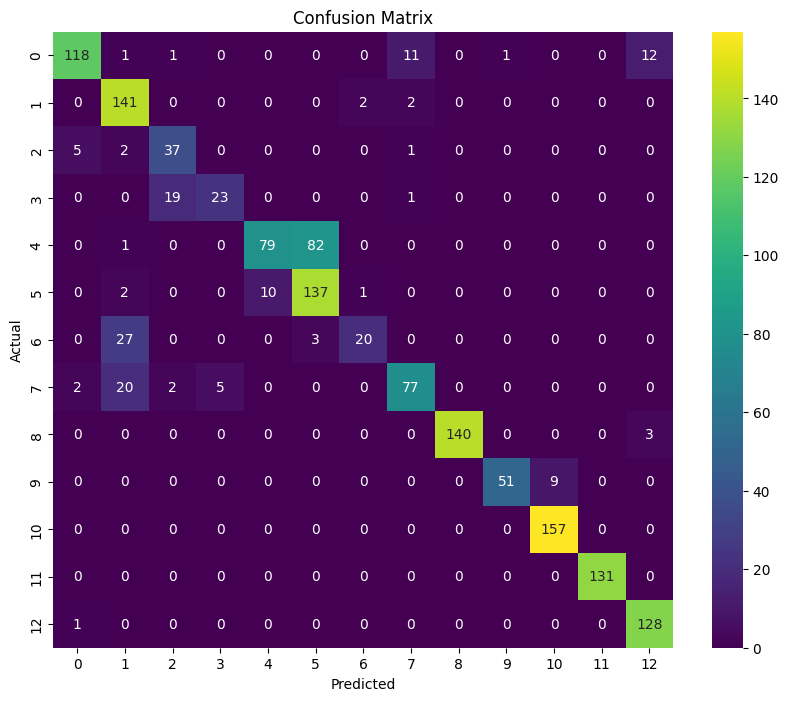

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reading CSV file
df = pd.read_csv(csv_path)

# Separating features and labels
X = df.iloc[1:, :-2].values
y = df.iloc[1:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Initialize and train the SVM classifier
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.4f}%")

# classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

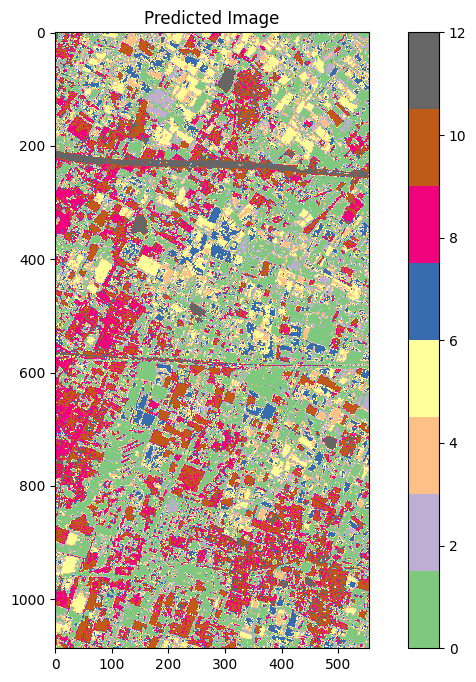

In [4]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Function to read and process the image
def read_image(image_path):
    with rasterio.open(image_path) as src:
        img = src.read()

        # Flatten the image for prediction
        img_flat = img.reshape((img.shape[0], -1)).T
    return img_flat, src.width, src.height

# Load and process the image

img_flat, img_width, img_height = read_image(image_path)

# Make predictions for each pixel using the trained SVM model
predictions = svm.predict(img_flat)

# Reshape the predictions to the original image dimensions
predicted_image = predictions.reshape((img_height, img_width))

# Plot the predicted image
plt.figure(figsize=(10, 8))
plt.title('Predicted Image')
plt.imshow(predicted_image, cmap='Accent') # Adjust cmap for better visualization
plt.colorbar()
plt.show()

RF (Random Forest) Model

Accuracy: 97.13311%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       164
         1.0       0.99      0.99      0.99       159
         2.0       0.91      0.93      0.92        45
         3.0       1.00      0.88      0.94        41
         4.0       0.97      0.94      0.96       140
         5.0       0.96      0.96      0.96       143
         6.0       0.92      0.98      0.95        45
         7.0       0.94      0.94      0.94        86
         8.0       0.99      1.00      1.00       148
         9.0       0.93      1.00      0.97        71
        10.0       1.00      0.99      1.00       150
        11.0       0.99      1.00      1.00       120
        12.0       0.99      0.99      0.99       153

    accuracy                           0.97      1465
   macro avg       0.97      0.96      0.96      1465
weighted avg       0.97      0.97      0.97      1465

Confusion Matrix:
 [[155   1   1   0

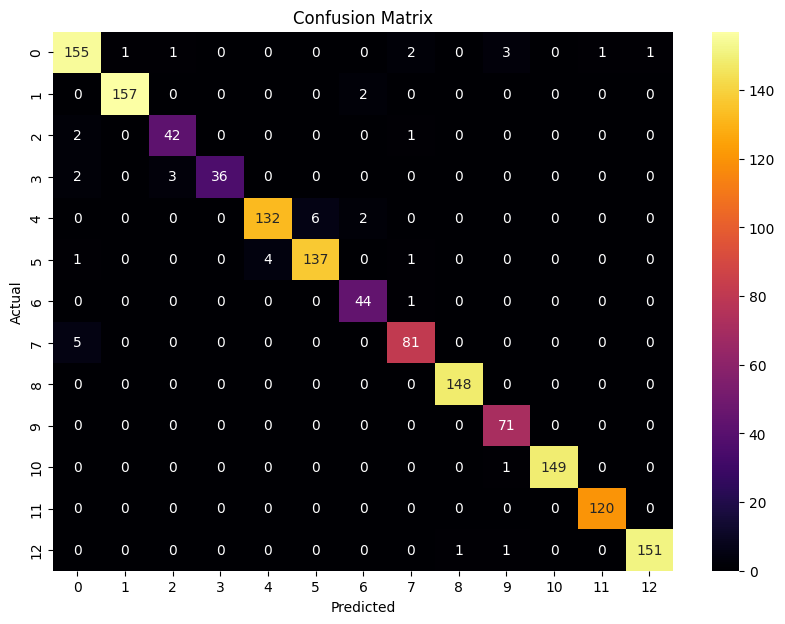

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reading CSV file
df = pd.read_csv(csv_path)

# Separating features and labels
X = df.iloc[1:, :-2].values
y = df.iloc[1:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.5f}%")

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


(np.float64(-0.5), np.float64(554.5), np.float64(1086.5), np.float64(-0.5))

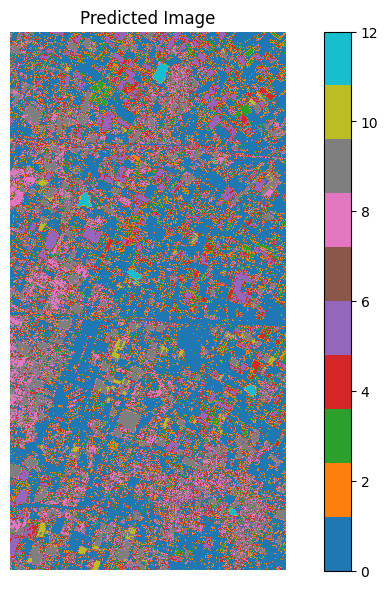

In [7]:
# Function to read and process the image
def read_image(image_path):
    with rasterio.open(image_path) as src:
        img = src.read()
        # Flatten the image for prediction
        img_flat = img.reshape((img.shape[0], -1)).T
    return img_flat, src.width, src.height
# Load and process the image

img_flat, img_width, img_height = read_image(image_path)

# Make predictions for each pixel
predictions = rf.predict(img_flat)

# Reshape the predictions to the original image dimensions
predicted_image = predictions.reshape((img_height, img_width))

# Plot the predicted image
plt.figure(figsize=(10, 7))
plt.title('Predicted Image')
plt.imshow(predicted_image, cmap='tab10') # Adjust cmap for better visualization
plt.colorbar()
plt.axis('off')

3.	What are the hyperparameters for both the methods and explain their effect in the classification task.
Ans. Support Vector Machine (SVM) Hyperparameters

-C (Regularization parameter):Balances the trade-off between having a larger margin and minimizing classification error. A small C value makes the decision surface smooth, while a large C aims to classify all training examples correctly.
-Kernel:Specifies the type of kernel function to use (e.g., linear, polynomial, radial basis function (RBF), sigmoid). It transforms the input data into the required form for the model to process. Choice of kernel affects the model's ability to handle different types of classification problems.
-Gamma (for RBF, Polynomial, and Sigmoid kernels):Defines how far the influence of a single training example reaches. Low gamma values consider points far from the plausible separation line, while high gamma values consider only points close to the plausible separation line.
-Degree (for Polynomial kernel):Determines the degree of the polynomial used in the kernel function. Higher degrees increase the model's complexity.

Random Forest Hyperparameters
-n_estimators:Number of trees in the forest. More trees generally improve the model’s accuracy but also increase computational time.
-max_depth:Maximum depth of each tree. Controls the complexity of the model. Shallow trees may underfit, while deep trees may overfit.
-min_samples_split:Minimum number of samples required to split an internal node. Higher values prevent the model from learning overly specific patterns (overfitting).
-min_samples_leaf:Minimum number of samples required to be at a leaf node. Larger values ensure leaf nodes are not created for small sample sizes, reducing the risk of overfitting.
-max_features:Number of features to consider when looking for the best split. Reducing the number of features may decrease overfitting.
-bootstrap: Whether to use bootstrap samples when building trees. If False, the entire dataset is used to build each tree.
Each hyperparameter plays a crucial role in tuning the model for optimal performance and striking the right balance between bias and variance. Tweaking these can significantly impact the accuracy, precision, recall, and overall robustness of the classification task.

4.	Write the hyperparameters at which you got your highest accuracy.
Ans. Support Vector Machine (SVM) Hyperparameters
-C (Regularization parameter):
-Kernel: Radial Basis Function (RBF)
-Gamma):

Random Forest Hyperparameters
-n_estimators: 100
-max_depth: None
-min_samples_split: 2
-min_samples_leaf: 1
-max_features: Sqrt

5.	Perform K means clustering with values of K as (7,10,13) on the given image.

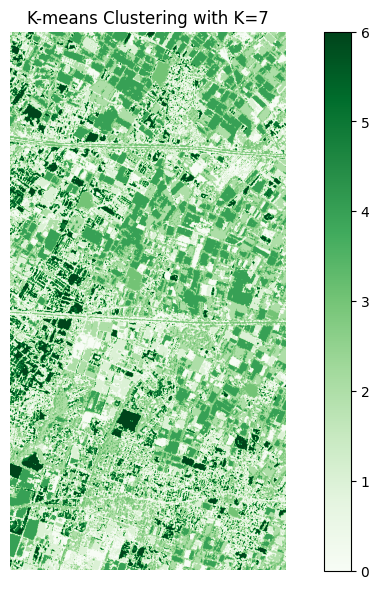

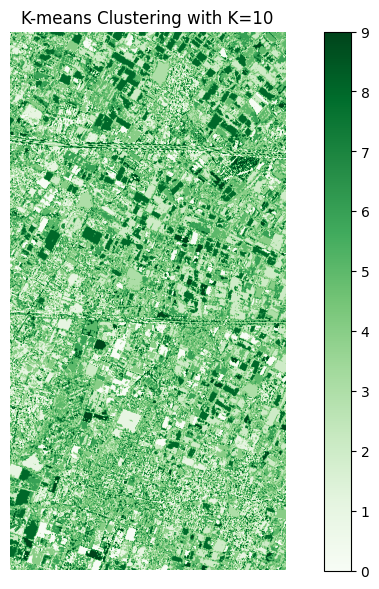

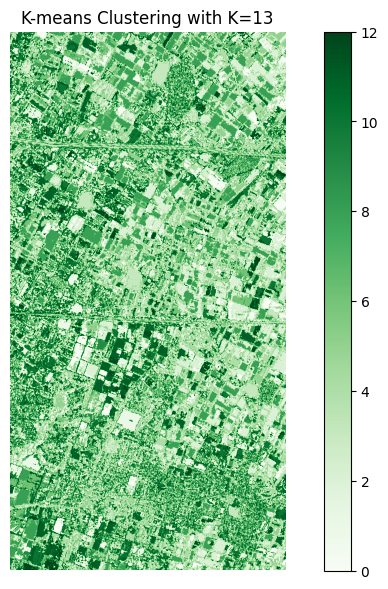

In [9]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Reading & Flattening the image for Clustering
def read_image(image_path):
    with rasterio.open(image_path) as src:
        img = src.read()
        img_flat = img.reshape((img.shape[0], -1)).T
    return img_flat, src.width, src.height

img_flat, img_width, img_height = read_image(image_path)

#applying K-means clustering
def apply_kmeans(img_flat, img_height, img_width, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(img_flat)
    clustered_image = clusters.reshape((img_height, img_width))
    plt.figure(figsize=(10, 7))
    plt.title(f'K-means Clustering with K={k}')
    plt.imshow(clustered_image, cmap='Greens') # Adjust cmap for better visualization
    plt.colorbar()
    plt.axis('off')
    plt.show()

# K-means clustering for K=7, 10, 13
for k in [7, 10, 13]:
    apply_kmeans(img_flat, img_height, img_width, k)

6.	Explain how K means works?

Unsupervised Machine Learning is the process of teaching a computer to use unlabeled, unclassified data and enabling the algorithm to operate on that data without supervision. Without any previous data training, the machine’s job in this case is to organize unsorted data according to parallels, patterns, and variations. 

K means clustering, assigns data points to one of the K clusters depending on their distance from the center of the clusters. It starts by randomly assigning the clusters centroid in the space. Then each data point assign to one of the cluster based on its distance from centroid of the cluster. After assigning each point to one of the cluster, new cluster centroids are assigned. This process runs iteratively until it finds good cluster. In the analysis we assume that number of cluster is given in advanced and we have to put points in one of the group.